## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215


0:	learn: 0.9760819	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9556319	total: 59.3ms	remaining: 29.6s
2:	learn: 0.9363391	total: 61.2ms	remaining: 20.3s
3:	learn: 0.9189689	total: 62.7ms	remaining: 15.6s
4:	learn: 0.9011192	total: 64.1ms	remaining: 12.8s
5:	learn: 0.8839071	total: 67ms	remaining: 11.1s
6:	learn: 0.8680983	total: 70.7ms	remaining: 10s
7:	learn: 0.8525358	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8377322	total: 74.8ms	remaining: 8.24s
9:	learn: 0.8221123	total: 75.9ms	remaining: 7.52s
10:	learn: 0.8084620	total: 77.4ms	remaining: 6.96s
11:	learn: 0.7931709	total: 79.4ms	remaining: 6.54s
12:	learn: 0.7785119	total: 81.1ms	remaining: 6.15s
13:	learn: 0.7646266	total: 82.3ms	remaining: 5.8s
14:	learn: 0.7533493	total: 83.6ms	remaining: 5.49s
15:	learn: 0.7393408	total: 84.7ms	remaining: 5.21s
16:	learn: 0.7267131	total: 85.9ms	remaining: 4.97s
17:	learn: 0.7139737	total: 87.3ms	remaining: 4.76s
18:	learn: 0.7022073	total: 88.5ms	remaining: 4.57s
19:	learn: 0.6887366	total:

88:	learn: 0.3253155	total: 186ms	remaining: 1.9s
89:	learn: 0.3231855	total: 187ms	remaining: 1.89s
90:	learn: 0.3207076	total: 189ms	remaining: 1.89s
91:	learn: 0.3184392	total: 192ms	remaining: 1.9s
92:	learn: 0.3167268	total: 194ms	remaining: 1.89s
93:	learn: 0.3146695	total: 195ms	remaining: 1.88s
94:	learn: 0.3127452	total: 197ms	remaining: 1.87s
95:	learn: 0.3108372	total: 199ms	remaining: 1.87s
96:	learn: 0.3093477	total: 203ms	remaining: 1.89s
97:	learn: 0.3074630	total: 204ms	remaining: 1.88s
98:	learn: 0.3057798	total: 206ms	remaining: 1.87s
99:	learn: 0.3044028	total: 207ms	remaining: 1.86s
100:	learn: 0.3029224	total: 209ms	remaining: 1.86s
101:	learn: 0.3012405	total: 210ms	remaining: 1.85s
102:	learn: 0.2999062	total: 214ms	remaining: 1.86s


103:	learn: 0.2987002	total: 221ms	remaining: 1.91s
104:	learn: 0.2971582	total: 223ms	remaining: 1.9s
105:	learn: 0.2956961	total: 225ms	remaining: 1.89s
106:	learn: 0.2940633	total: 226ms	remaining: 1.89s
107:	learn: 0.2923837	total: 227ms	remaining: 1.88s
108:	learn: 0.2909044	total: 229ms	remaining: 1.87s
109:	learn: 0.2895405	total: 230ms	remaining: 1.86s
110:	learn: 0.2883017	total: 231ms	remaining: 1.85s
111:	learn: 0.2870896	total: 234ms	remaining: 1.86s
112:	learn: 0.2855870	total: 236ms	remaining: 1.85s
113:	learn: 0.2843818	total: 237ms	remaining: 1.84s
114:	learn: 0.2831408	total: 238ms	remaining: 1.83s
115:	learn: 0.2818952	total: 240ms	remaining: 1.82s
116:	learn: 0.2806713	total: 241ms	remaining: 1.82s
117:	learn: 0.2792206	total: 243ms	remaining: 1.81s
118:	learn: 0.2778585	total: 244ms	remaining: 1.8s
119:	learn: 0.2770197	total: 245ms	remaining: 1.79s
120:	learn: 0.2756417	total: 246ms	remaining: 1.79s
121:	learn: 0.2744977	total: 247ms	remaining: 1.78s
122:	learn: 0.

173:	learn: 0.2297352	total: 343ms	remaining: 1.63s
174:	learn: 0.2291869	total: 344ms	remaining: 1.62s
175:	learn: 0.2286423	total: 345ms	remaining: 1.62s
176:	learn: 0.2278757	total: 350ms	remaining: 1.63s
177:	learn: 0.2269301	total: 351ms	remaining: 1.62s
178:	learn: 0.2263420	total: 352ms	remaining: 1.61s
179:	learn: 0.2255004	total: 353ms	remaining: 1.61s
180:	learn: 0.2244912	total: 355ms	remaining: 1.61s
181:	learn: 0.2235059	total: 356ms	remaining: 1.6s
182:	learn: 0.2230648	total: 357ms	remaining: 1.59s
183:	learn: 0.2220993	total: 358ms	remaining: 1.59s
184:	learn: 0.2214355	total: 360ms	remaining: 1.58s
185:	learn: 0.2206062	total: 361ms	remaining: 1.58s
186:	learn: 0.2198260	total: 362ms	remaining: 1.57s
187:	learn: 0.2190859	total: 363ms	remaining: 1.57s
188:	learn: 0.2186483	total: 364ms	remaining: 1.56s
189:	learn: 0.2180544	total: 365ms	remaining: 1.56s
190:	learn: 0.2173736	total: 366ms	remaining: 1.55s
191:	learn: 0.2166759	total: 367ms	remaining: 1.54s
192:	learn: 0

210:	learn: 0.2061153	total: 390ms	remaining: 1.46s
211:	learn: 0.2055826	total: 392ms	remaining: 1.46s
212:	learn: 0.2047996	total: 393ms	remaining: 1.45s
213:	learn: 0.2042015	total: 394ms	remaining: 1.45s
214:	learn: 0.2039347	total: 396ms	remaining: 1.45s
215:	learn: 0.2034977	total: 398ms	remaining: 1.44s
216:	learn: 0.2028133	total: 399ms	remaining: 1.44s
217:	learn: 0.2023706	total: 400ms	remaining: 1.43s
218:	learn: 0.2018773	total: 401ms	remaining: 1.43s
219:	learn: 0.2015511	total: 403ms	remaining: 1.43s
220:	learn: 0.2008995	total: 404ms	remaining: 1.42s
221:	learn: 0.2002661	total: 405ms	remaining: 1.42s
222:	learn: 0.1996394	total: 408ms	remaining: 1.42s
223:	learn: 0.1991758	total: 410ms	remaining: 1.42s
224:	learn: 0.1986536	total: 411ms	remaining: 1.42s
225:	learn: 0.1981722	total: 414ms	remaining: 1.42s
226:	learn: 0.1975715	total: 415ms	remaining: 1.41s
227:	learn: 0.1971488	total: 418ms	remaining: 1.41s
228:	learn: 0.1966720	total: 419ms	remaining: 1.41s
229:	learn: 

304:	learn: 0.1672009	total: 530ms	remaining: 1.21s
305:	learn: 0.1668021	total: 531ms	remaining: 1.2s
306:	learn: 0.1666301	total: 533ms	remaining: 1.2s
307:	learn: 0.1662428	total: 534ms	remaining: 1.2s
308:	learn: 0.1658868	total: 535ms	remaining: 1.2s
309:	learn: 0.1655189	total: 536ms	remaining: 1.19s
310:	learn: 0.1653852	total: 537ms	remaining: 1.19s
311:	learn: 0.1650251	total: 538ms	remaining: 1.19s
312:	learn: 0.1647571	total: 540ms	remaining: 1.18s
313:	learn: 0.1645242	total: 541ms	remaining: 1.18s
314:	learn: 0.1641502	total: 542ms	remaining: 1.18s
315:	learn: 0.1640712	total: 544ms	remaining: 1.18s
316:	learn: 0.1638199	total: 545ms	remaining: 1.17s
317:	learn: 0.1634867	total: 546ms	remaining: 1.17s
318:	learn: 0.1632248	total: 547ms	remaining: 1.17s
319:	learn: 0.1629001	total: 548ms	remaining: 1.17s
320:	learn: 0.1623672	total: 550ms	remaining: 1.16s
321:	learn: 0.1620220	total: 551ms	remaining: 1.16s
322:	learn: 0.1616093	total: 552ms	remaining: 1.16s
323:	learn: 0.16

343:	learn: 0.1563079	total: 578ms	remaining: 1.1s
344:	learn: 0.1558504	total: 579ms	remaining: 1.1s
345:	learn: 0.1557385	total: 580ms	remaining: 1.1s
346:	learn: 0.1551178	total: 581ms	remaining: 1.09s
347:	learn: 0.1548856	total: 583ms	remaining: 1.09s
348:	learn: 0.1546919	total: 584ms	remaining: 1.09s
349:	learn: 0.1544324	total: 585ms	remaining: 1.09s
350:	learn: 0.1542402	total: 587ms	remaining: 1.08s
351:	learn: 0.1537155	total: 588ms	remaining: 1.08s
352:	learn: 0.1534380	total: 589ms	remaining: 1.08s
353:	learn: 0.1531472	total: 591ms	remaining: 1.08s
354:	learn: 0.1526418	total: 592ms	remaining: 1.07s
355:	learn: 0.1523323	total: 593ms	remaining: 1.07s
356:	learn: 0.1520534	total: 594ms	remaining: 1.07s
357:	learn: 0.1518847	total: 594ms	remaining: 1.07s
358:	learn: 0.1516100	total: 595ms	remaining: 1.06s
359:	learn: 0.1515471	total: 597ms	remaining: 1.06s
360:	learn: 0.1513802	total: 598ms	remaining: 1.06s
361:	learn: 0.1510690	total: 599ms	remaining: 1.05s
362:	learn: 0.1

420:	learn: 0.1335338	total: 685ms	remaining: 942ms
421:	learn: 0.1334365	total: 687ms	remaining: 941ms
422:	learn: 0.1331218	total: 689ms	remaining: 939ms
423:	learn: 0.1330728	total: 690ms	remaining: 938ms
424:	learn: 0.1326094	total: 692ms	remaining: 937ms
425:	learn: 0.1323088	total: 694ms	remaining: 936ms
426:	learn: 0.1322710	total: 695ms	remaining: 933ms
427:	learn: 0.1319621	total: 697ms	remaining: 931ms
428:	learn: 0.1315888	total: 698ms	remaining: 929ms
429:	learn: 0.1311838	total: 699ms	remaining: 926ms
430:	learn: 0.1309397	total: 700ms	remaining: 924ms
431:	learn: 0.1307231	total: 701ms	remaining: 922ms
432:	learn: 0.1304224	total: 702ms	remaining: 920ms
433:	learn: 0.1302179	total: 704ms	remaining: 917ms
434:	learn: 0.1301831	total: 705ms	remaining: 915ms
435:	learn: 0.1299201	total: 706ms	remaining: 913ms
436:	learn: 0.1296710	total: 707ms	remaining: 911ms
437:	learn: 0.1296384	total: 708ms	remaining: 908ms
438:	learn: 0.1294741	total: 709ms	remaining: 906ms
439:	learn: 

459:	learn: 0.1239602	total: 731ms	remaining: 858ms
460:	learn: 0.1236316	total: 733ms	remaining: 856ms
461:	learn: 0.1234071	total: 734ms	remaining: 854ms
462:	learn: 0.1231732	total: 735ms	remaining: 852ms
463:	learn: 0.1229789	total: 736ms	remaining: 850ms
464:	learn: 0.1226234	total: 737ms	remaining: 848ms
465:	learn: 0.1224930	total: 738ms	remaining: 845ms
466:	learn: 0.1221938	total: 739ms	remaining: 843ms
467:	learn: 0.1220265	total: 740ms	remaining: 841ms
468:	learn: 0.1217654	total: 741ms	remaining: 839ms
469:	learn: 0.1217267	total: 742ms	remaining: 837ms
470:	learn: 0.1214960	total: 743ms	remaining: 834ms
471:	learn: 0.1212138	total: 744ms	remaining: 832ms
472:	learn: 0.1208924	total: 745ms	remaining: 830ms
473:	learn: 0.1208143	total: 747ms	remaining: 829ms
474:	learn: 0.1207412	total: 749ms	remaining: 827ms
475:	learn: 0.1204406	total: 750ms	remaining: 825ms
476:	learn: 0.1203819	total: 751ms	remaining: 824ms
477:	learn: 0.1201850	total: 752ms	remaining: 822ms
478:	learn: 

581:	learn: 0.0997618	total: 859ms	remaining: 617ms
582:	learn: 0.0996123	total: 860ms	remaining: 615ms
583:	learn: 0.0995885	total: 861ms	remaining: 614ms
584:	learn: 0.0993761	total: 863ms	remaining: 612ms
585:	learn: 0.0992227	total: 864ms	remaining: 610ms
586:	learn: 0.0989127	total: 865ms	remaining: 608ms
587:	learn: 0.0986805	total: 866ms	remaining: 607ms
588:	learn: 0.0984923	total: 867ms	remaining: 605ms
589:	learn: 0.0983369	total: 868ms	remaining: 603ms
590:	learn: 0.0982430	total: 869ms	remaining: 601ms
591:	learn: 0.0981201	total: 870ms	remaining: 599ms
592:	learn: 0.0979108	total: 870ms	remaining: 597ms
593:	learn: 0.0976784	total: 871ms	remaining: 595ms
594:	learn: 0.0974569	total: 872ms	remaining: 593ms
595:	learn: 0.0971981	total: 873ms	remaining: 591ms
596:	learn: 0.0970385	total: 873ms	remaining: 590ms
597:	learn: 0.0968227	total: 874ms	remaining: 588ms
598:	learn: 0.0966340	total: 875ms	remaining: 586ms
599:	learn: 0.0964822	total: 876ms	remaining: 584ms
600:	learn: 

627:	learn: 0.0924297	total: 906ms	remaining: 537ms
628:	learn: 0.0922741	total: 907ms	remaining: 535ms
629:	learn: 0.0921430	total: 908ms	remaining: 533ms
630:	learn: 0.0920089	total: 909ms	remaining: 532ms
631:	learn: 0.0918386	total: 910ms	remaining: 530ms
632:	learn: 0.0917927	total: 911ms	remaining: 528ms
633:	learn: 0.0915395	total: 912ms	remaining: 526ms
634:	learn: 0.0914974	total: 913ms	remaining: 525ms
635:	learn: 0.0913749	total: 914ms	remaining: 523ms
636:	learn: 0.0911745	total: 915ms	remaining: 521ms
637:	learn: 0.0909803	total: 916ms	remaining: 519ms
638:	learn: 0.0908816	total: 917ms	remaining: 518ms
639:	learn: 0.0906997	total: 918ms	remaining: 516ms
640:	learn: 0.0905162	total: 918ms	remaining: 514ms
641:	learn: 0.0904638	total: 919ms	remaining: 513ms
642:	learn: 0.0902836	total: 920ms	remaining: 511ms
643:	learn: 0.0900874	total: 921ms	remaining: 509ms
644:	learn: 0.0899277	total: 922ms	remaining: 508ms
645:	learn: 0.0897319	total: 923ms	remaining: 506ms
646:	learn: 

778:	learn: 0.0737023	total: 1.05s	remaining: 298ms
779:	learn: 0.0736184	total: 1.05s	remaining: 296ms
780:	learn: 0.0736035	total: 1.05s	remaining: 295ms
781:	learn: 0.0735129	total: 1.05s	remaining: 293ms
782:	learn: 0.0733712	total: 1.05s	remaining: 292ms
783:	learn: 0.0732485	total: 1.05s	remaining: 290ms
784:	learn: 0.0731246	total: 1.05s	remaining: 289ms
785:	learn: 0.0730972	total: 1.06s	remaining: 288ms
786:	learn: 0.0729598	total: 1.06s	remaining: 286ms
787:	learn: 0.0729118	total: 1.06s	remaining: 285ms
788:	learn: 0.0728089	total: 1.06s	remaining: 283ms
789:	learn: 0.0726796	total: 1.06s	remaining: 282ms
790:	learn: 0.0726564	total: 1.06s	remaining: 280ms
791:	learn: 0.0724717	total: 1.06s	remaining: 279ms
792:	learn: 0.0724383	total: 1.06s	remaining: 278ms
793:	learn: 0.0722826	total: 1.06s	remaining: 276ms
794:	learn: 0.0720763	total: 1.06s	remaining: 275ms
795:	learn: 0.0719672	total: 1.06s	remaining: 273ms
796:	learn: 0.0718484	total: 1.07s	remaining: 272ms
797:	learn: 

828:	learn: 0.0685025	total: 1.1s	remaining: 226ms
829:	learn: 0.0683995	total: 1.1s	remaining: 225ms
830:	learn: 0.0683166	total: 1.1s	remaining: 223ms
831:	learn: 0.0682192	total: 1.1s	remaining: 222ms
832:	learn: 0.0680318	total: 1.1s	remaining: 221ms
833:	learn: 0.0679623	total: 1.1s	remaining: 219ms
834:	learn: 0.0678303	total: 1.1s	remaining: 218ms
835:	learn: 0.0677521	total: 1.1s	remaining: 217ms
836:	learn: 0.0676943	total: 1.1s	remaining: 215ms
837:	learn: 0.0675880	total: 1.11s	remaining: 214ms
838:	learn: 0.0674840	total: 1.11s	remaining: 212ms
839:	learn: 0.0673967	total: 1.11s	remaining: 211ms
840:	learn: 0.0672404	total: 1.11s	remaining: 210ms
841:	learn: 0.0672197	total: 1.11s	remaining: 208ms
842:	learn: 0.0670480	total: 1.11s	remaining: 207ms
843:	learn: 0.0669511	total: 1.11s	remaining: 205ms
844:	learn: 0.0668879	total: 1.11s	remaining: 204ms
845:	learn: 0.0668167	total: 1.11s	remaining: 203ms
846:	learn: 0.0667790	total: 1.11s	remaining: 201ms
847:	learn: 0.0666944

976:	learn: 0.0569771	total: 1.24s	remaining: 29.2ms
977:	learn: 0.0569036	total: 1.24s	remaining: 27.9ms
978:	learn: 0.0567654	total: 1.24s	remaining: 26.7ms
979:	learn: 0.0566896	total: 1.24s	remaining: 25.4ms
980:	learn: 0.0565511	total: 1.24s	remaining: 24.1ms
981:	learn: 0.0565156	total: 1.25s	remaining: 22.8ms
982:	learn: 0.0564782	total: 1.25s	remaining: 21.6ms
983:	learn: 0.0563981	total: 1.25s	remaining: 20.3ms
984:	learn: 0.0563531	total: 1.25s	remaining: 19ms
985:	learn: 0.0562813	total: 1.25s	remaining: 17.7ms
986:	learn: 0.0562696	total: 1.25s	remaining: 16.5ms
987:	learn: 0.0561567	total: 1.25s	remaining: 15.2ms
988:	learn: 0.0561182	total: 1.25s	remaining: 13.9ms
989:	learn: 0.0560290	total: 1.25s	remaining: 12.7ms
990:	learn: 0.0559517	total: 1.25s	remaining: 11.4ms
991:	learn: 0.0559192	total: 1.25s	remaining: 10.1ms
992:	learn: 0.0558173	total: 1.26s	remaining: 8.86ms
993:	learn: 0.0557493	total: 1.26s	remaining: 7.59ms
994:	learn: 0.0556479	total: 1.26s	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

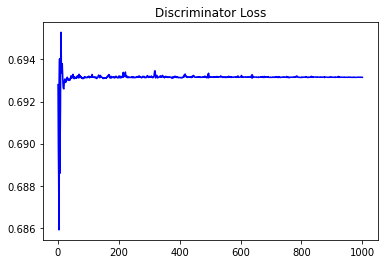

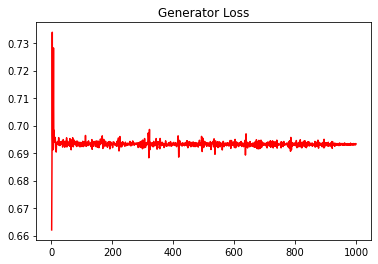

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12903936217946965


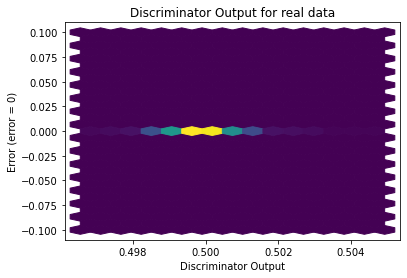

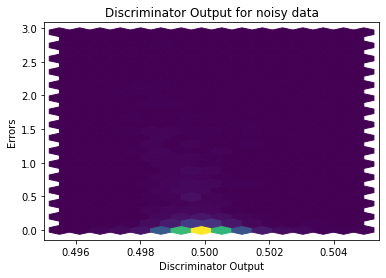

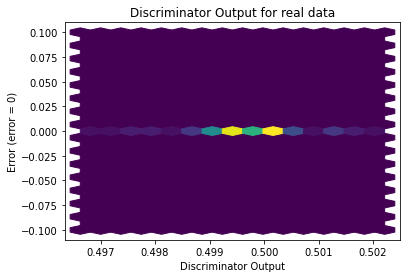

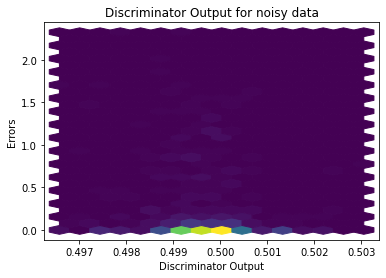

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


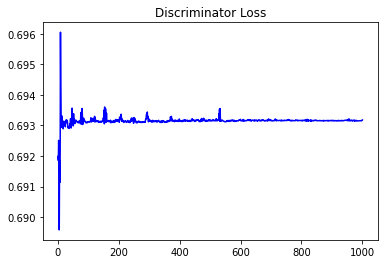

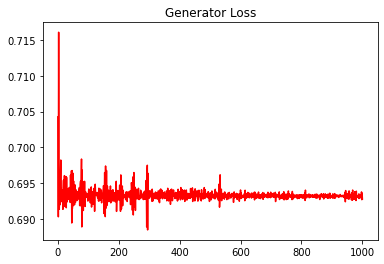

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14177936340410574


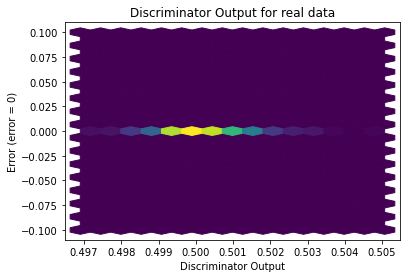

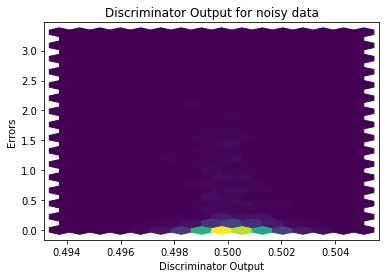

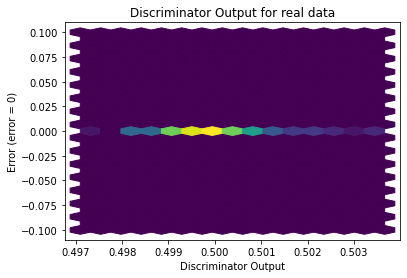

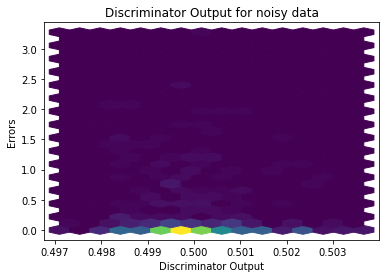

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4319]], requires_grad=True)
